# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Solutions to Assignment 0 posted on Canvas
 - Assignment 1 due Sunday, October 11 at midnight
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)

## Week 2

 - Art of Electronics (AoE) Chapter 2
 - Microelectronics (Sedra/Smith) Chapter 6

## EE 538 student backgrounds

([<matplotlib.axis.XTick at 0x4178e68>,
 [Text(0, 0, 'Electrical Engineering'),
  Text(1, 0, 'Other Engineering'),
  Text(2, 0, 'Other')])

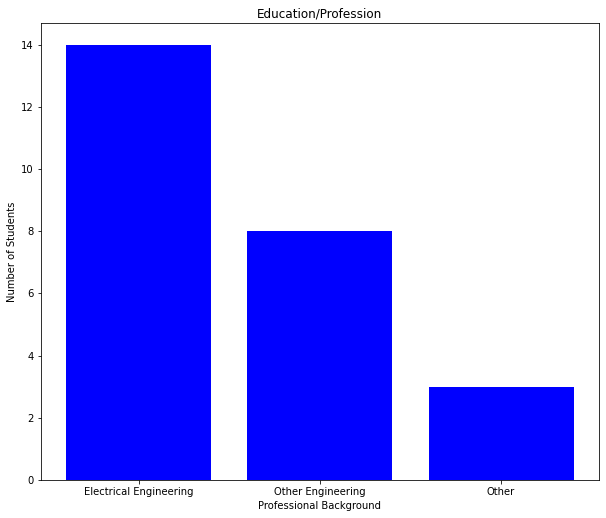

In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('ggplot')

x = ['Electrical Engineering', 'Other Engineering', 'Other']
energy = [14, 8, 3]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10.0,8.4))
plt.bar(x_pos, energy, color='blue')
plt.xlabel("Professional Background")
plt.ylabel("Number of Students")
plt.title("Education/Profession")

plt.xticks(x_pos, x)

<center>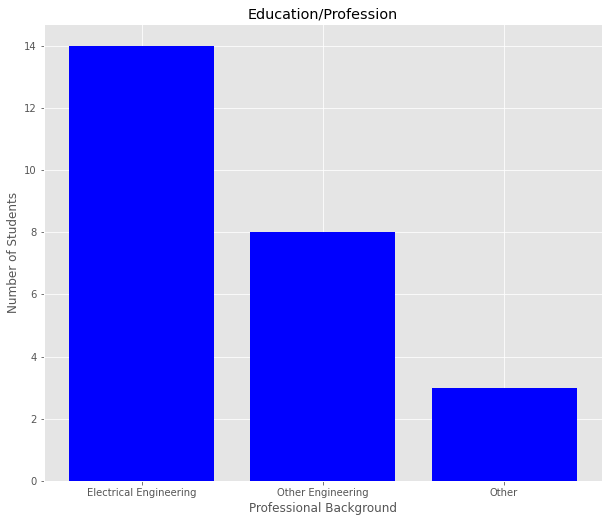</center>

## Homework 0 Statistics

([<matplotlib.axis.XTick at 0x10ad2b38>,
 [Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '4')])

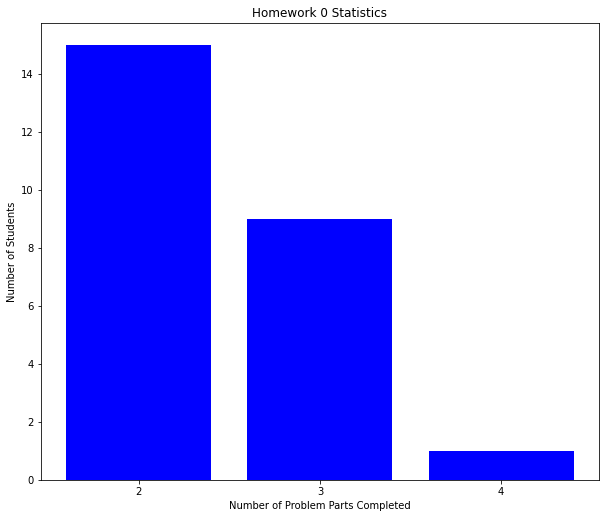

In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('ggplot')

x = ['2', '3', '4']
energy = [15, 9, 1]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10.0,8.4))
plt.bar(x_pos, energy, color='blue')
plt.xlabel("Number of Problem Parts Completed")
plt.ylabel("Number of Students")
plt.title("Homework 0 Statistics")

plt.xticks(x_pos, x)

<center>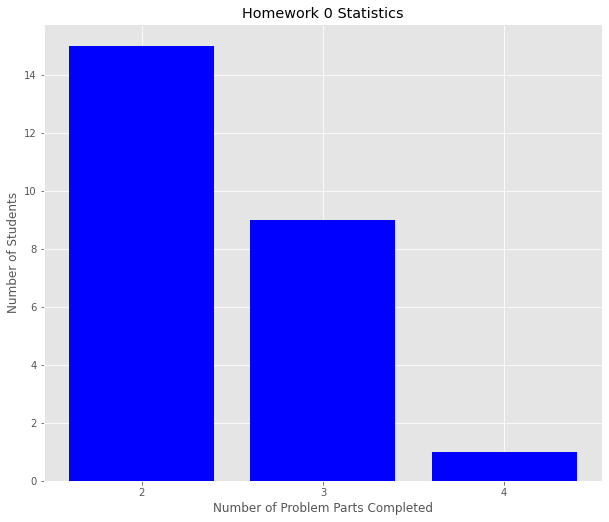</center>

## Overview

 - Last time...
    - Sensor interfaces
    - Thevenin/Norton models
    - Frequency response
    - Transient response
 - Today...
     - BJT physics
     - Ebers Moll BJT model
     - Small-signal BJT model
     - Common-emitter amplifier
     - Emitter-follower

## Python packages/modules

In [3]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

# Lecture 2 - Bipolar junction transistors

## The ideal transistor

<center><img src="img/ideal_transistor.png" width=350 /></center>

$$ I_{out} = G\cdot V_{ctrl}$$

$$ [G_m] = A/V = S = \Omega^{-1} $$

$$ I_{in} \rightarrow 0 $$

$$ R_{eq} \rightarrow \infty $$

 - An ideal transistor is a 3-terminal device that allows control of a current $I_{out}$ via the control voltage $V_{ctrl}$ (voltage-controlled current source)
 - Gain is possible because $I_{out}$ is supplied by the output's power supply, not the driving circuit
 - The fact that $I_{in} = 0$ also means there is, ideally, no DC loading of the driving circuit
 - The absence of static loading reduces power consumption and is what makes ultra-low power digital circuits possible

## How do we achieve voltage gain?

<center><img src="img/gain_circuit.png" width=600 /></center>

$$I_{in} = 0 \rightarrow V_{in} = V_S $$

$$V_{out} = -G_mV_{in}\cdot R_{out}$$

$$A_v = \dfrac{V_{out}}{V_{in}} = -GR_{out} $$

 - Input voltage is converted to a current via transconductance $G_m$ 
 - Transconductance has units of siemens, symbol __S__, where 1 __S__ = 1 A/V
 - Output voltage is the product of current and output resistance $R_{out}$
 - This is the approach used to realize voltage gain in circuits based on BJTs, FETs, and even vacuum tubes

## Bipolar junction transistor (*npn* BJT)

<center><img src="img/npn_transistor.png" width=250 /></center>

 - 3-terminal device consisting of base ($B$), collector ($C$), and emitter ($E$)
 - Collector current $I_c$, controlled by the base-emitter voltage $V_{be}$, flows from collector to emitter
 - Base current is $I_b$ incidental to device operation, but it desirable for this current to be small
 - Emitter current $I_e$ is the sum of $I_c$ and $I_b$

## BJT physical structure

<center><img src="img/npn_structure.png" width=800 /></center>

 - *n*-type semiconductors are formed using an *excess* of electrons, while *p*-type semiconductors are formed by generating a *deficit* of electrons (called "holes")
 - BJT consists of two *pn*-junctions (diodes), the base-emitter junction and the base-collector junction
 - The *bias* condition of each diode (i.e. the voltage across it) determines the BJT mode of operation
 - In the *active* mode, which we use when we want the BJT to operate as an amplifier, the base-emitter voltage controls the current flowing from collector to emitter

## Current flow in an *npn* BJT

<center><img src="img/npn_current.png" width=700 /></center>

- $V_{be}$ controls the *potential barrier* for electrons trying to diffuse into the base region
- For $V_{be} > 0$ (forward bias), electrons diffuse from (are emitted by) the emitter into base
- The electric field generated by $V_{cb}$ causes electrons to be swept into (collected by) the collector 
- The base-emitter *pn*-junction is *forward-biased*, while the base-collector junction is *reverse-biased*

## Exponential (Ebers-Moll) model

<center><img src="img/NPN_transistor.png" width=300 /></center>

$$I_c = I_S(e^{V_{BE}/V_T} - 1) $$

\begin{align} I_b = I_c/\beta && I_e = I_b + I_c
\end{align}

$$ V_{be} = \dfrac{kT}{q}ln\left(\dfrac{I_c}{I_S}+1\right) $$

 - In the active mode, collector current ($I_c$) is an *exponential* function of $V_{be}$
 - Base current ($I_b$) is smaller than $I_c$ by an (approximately) constant factor $\beta$, which is typically in the range of 10 to several hundred
 - A large value of $\beta$ is desirable to minimize loading at the base of the BJT, which typically functions as an input
 - If $I_c$ is held constant, $V_{be}$ is a *logarithmic* function of $I_c$

## *npn* I-V relationship

 - Let's define a function that uses the exponential model to calculate $I_c$ for an arbitrary $V_{be}$:

In [4]:
def npn_iv(V_be):
    Is = 1e-15      # saturation current (device parameter)
    k = 1.38e-23    # Boltzmann constant (physical constant)
    T = 300         # absolute temperature
    q = 1.6e-19     # charge of an electron
    V_T = k*T/q     # thermal voltage
    
    I_c = Is*(np.exp(V_be/V_T) - 1) 

    return I_c

Let's plot $I_c$ versus $V_{be}$ using linear axes

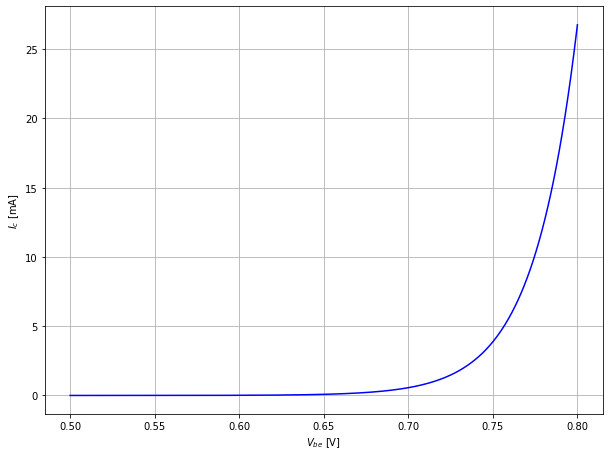

In [5]:
V_be = np.linspace(0.5,0.8,num=700)
I_c = npn_iv(V_be)
plot_xy(V_be, 1e3*I_c, '$V_{be}$ [V]', '$I_c$ [mA]') 

 - Due to the expoential dependence on $V_{be}$, $I_c$ remains vanishingly small until $V_{be} \approx 0.6V$ 
 - Beyond this, the I-V curve becomes very steep, as $V_{be}$ remains relatively constant while $I_c$ continues to increase

 Let's take a look at the same plot using a logarithmic axis for $I_c$

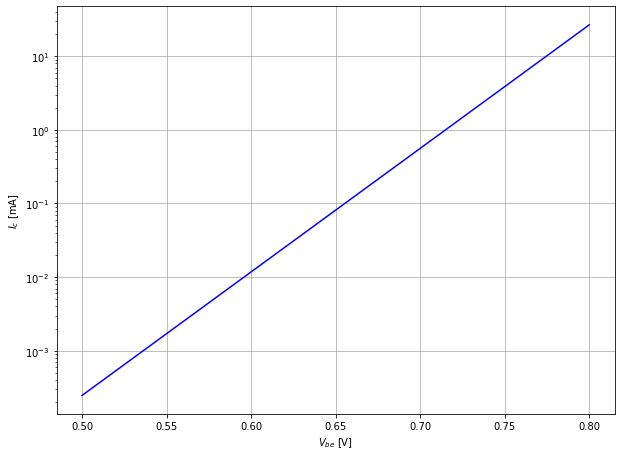

In [6]:
plot_xlogy(V_be, 1e3*I_c, '$V_{be}$ [V]', '$I_c$ [mA]' )

 - *Handy rule of thumb*: Every ~60mV increase in $V_{be}$ results in a 10-fold increase in $I_c$

## Our first amplifier (common-emitter)

<center><img src="img/common_emitter.png" width=300 /></center>

\begin{align} I_c &\approx I_Se^{V_{be}/V_T} \end{align}

\begin{align} I_b &= I_c/ \beta && I_e = I_b + I_c
\end{align}

\begin{align}
V_{out} &= V_{CC} - I_c \cdot R_C \\
&= V_{CC} - I_Se^{V_{be}/V_T} \cdot R_C\\
\end{align}

 - $V_{in}$ increases $I_c$ to produce a voltage drop across $V_{CC}$
 - As $V_{in}$ increases, $V_{out}$ decreases, resulting in an *inverting* relationship
 - That is, $V_{out}$ becomes *more negative* (not smaller) as $V_{in}$ increases
 - This is referred to as the *common-emitter* configuration, and it is the primary structure used to produce gain in analog circuits

## Plotting voltage gain

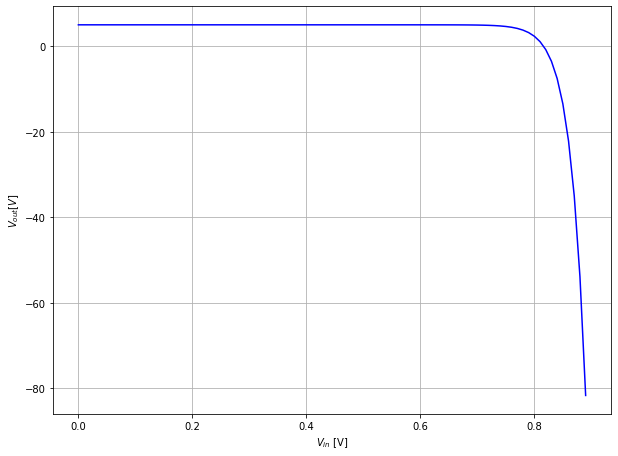

In [7]:
V_CC = 5
R_C = 100
V_in = np.arange(0, .9, step=0.01)
V_out = V_CC -  R_C*npn_iv(V_in)

plot_xy(V_in, V_out, '$V_{in}$ [V]', '$V_{out} [V]$')

 - Something is wrong. $V_{out}$ appears to become arbitrarily small, even negative, as $V_{in}$ increases. What are we missing?

## Dependence on collector voltage

 - Intuitively, we expect the minimum value of $V_{out}$ to be limited by the ground voltage (0V)
 - This requires some mechanism to limit $I_c$ from continuing to increase once $V_{out}$ moves close to ground
 - In fact, a positive value of $V_{ce}$ is required to keep the transistor in active mode (in practice, $V_{ce} > 100mV$)
 - Let's take a look at the circuit's behavior using SPICE...

## Voltage gain

 - We can import the SPICE simulation data using the data analysis package __pandas__:

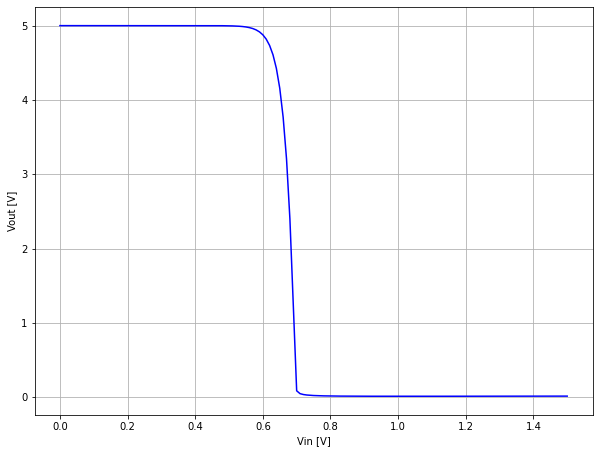

In [8]:
import pandas as pd
V_out = pd.read_csv('common_emitter.csv', sep='\t')
plot_xy(V_out['v2'], V_out['V(vout)'], 'Vin [V]', 'Vout [V]')

 - As expected, $V_{out}$ decreases from $V_{CC}$ until it reaches 0, at which point it stops changing

To calcuate the gain of the amplifier, we need to determine the *change* in $V_{out}$ versus the *change* in $V_{in}$, which is equivalent to taking the derivative:

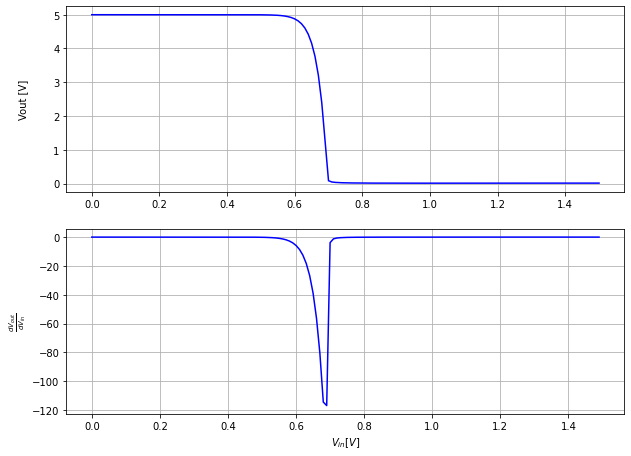

In [9]:
dV_out = np.diff(V_out['V(vout)'])/np.diff(V_out['v2'])
plot_xy2(V_out['v2'], V_out['V(vout)'], 'Vin [V]', 'Vout [V]',
         V_out['v2'][0:-1], dV_out, r'$V_{in} [V]$', r'$\frac{dV_{out}}{dV_{in}}$')

 - Note that "gain" is a function of the input voltage, reaching a maximum value of about $-120V/V$ for $V_{in} \approx 0.7V$
 - This dependence of gain on the input voltage is due to the nonlinear relationship between $V_{in}$ and $I_c$

## Determining the gain

 - For a "small" change in $V_{in}$, what is the corresponding change in $V_{out}$?
 - We can determine the *sensitivity* to small changes in the input by taking the derivative of the expression for $V_{out}$:
 
  \begin{align} 
  \dfrac{\partial V_{out}}{\partial V_{in}} &=  \dfrac{\partial}{\partial V_{in}}\left[V_{CC} - I_Se^{(V_{in})/V_T} R_C \right] \\
  \dfrac{\partial V_{out}}{\partial V_{in}} &=  0 - \dfrac{1}{V_T} \cdot I_Se^{(V_{in})/V_T} R_C \\
  \end{align}
  
 - Note that the derivative of the DC voltage $V_{CC}$ is zero, since it is a constant
 - This last expression can be used to calculate the gain for a particular value of $V_{in}$, $V_{in0}$:
 
  \begin{align} 
  \dfrac{\partial V_{out}}{\partial V_{in}}(V_{in1}) &=  -\dfrac{1}{V_T} \cdot I_Se^{(V_{in0})/V_T} R_C \\
  &= -\dfrac{I_{C0}}{V_T}R_C 
  \end{align}
  
 - If we ensure that $V_{in}$ remains close to this value during circuit operation, this expression can be used to determine the change in $V_{out}$ with little error

## Small-signal transconductance

 - Instead of linearizing at the circuit level, it is more convenient to linearize the operation of the BJT transistor itself
 - To assess how the collector current $I_c$ responds to small changes in $V_{be}$, we use the derivative of $I_c$ with respect to $V_{be}$:
 
 \begin{align}
 \dfrac{\partial}{\partial V_{be}} I_S \left(e^{V_{be}/V_T} - 1\right) = \dfrac{1}{V_T}I_S e^{V_{be}/V_T}
 \end{align}
 
 - We define this as the small-signal transconductance $g_m$, which depends linearly on the collector current:
 
 \begin{align}
 g_m = \dfrac{1}{V_T}I_S e^{V_{be}/V_T} = \dfrac{I_c}{V_T}
 \end{align}
 
 - Using $g_m$, we can replace the exponential model with a linear one to enable linear circuit analysis

## BJT, linearized

<center><img src="img/npn_gm.png" width=1000 /></center>

 - While the exponential model describes the relationship between $I_c$ and $V_{be}$ over a wide range of voltages/currents (large signal), the trasconductance parameter $g_m$ describes how the the collector current responds to *small changes* in $V_{be}$ (small-signal)
 - The small-signal model allows us to analyze transistor-based circuits in the same way we analyze other linear circuits (i.e. those with resistors, capacitors, and ideal voltage and current sources)
 - Linear analog design is based on this *small-signal approximation*

## Plotting transconductance

In [10]:
def g_m(V_BE0):
    Is = 1e-15      # saturation current (device parameter)
    k = 1.38e-23    # Boltzmann constant (physical constant)
    T = 300         # absolute temperature
    q = 1.6e-19     # charge of an electron
    V_T = k*T/q     # thermal voltage
    I_C0 = npn_iv(V_BE0)
    return I_C0/V_T 

def gm_line (V_be, V_BE0, I_C0):
    return g_m(V_BE0)*(V_be - V_BE0) + I_C0

def plot_gm(V_be, V_BE1, V_be_range):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    ax.plot(V_be, 1e3*npn_iv(V_be), 
            label=r'$I_Se^{V_{be}/V_T}-1$')
    I_C1 = npn_iv(V_BE1)
    ax.scatter(V_BE1, 1e3*I_C1, color='C1',s=10)
    ax.plot(V_be_range, 1e3*gm_line(V_be_range, V_BE1, I_C1), 
            'C1--', linewidth=2, label=r'$g_mV_{be}$')
    ax.set_xlabel(r'$V_{be} [V]$')
    ax.set_ylabel(r'$I_{C} [mA]$')
    ax.grid()
    ax.legend()

### Linear versus exponential model

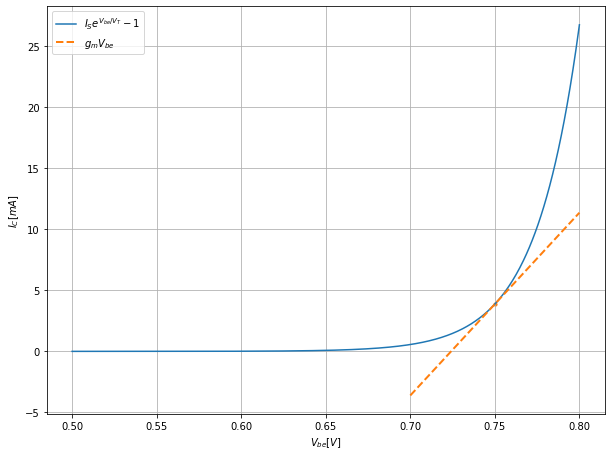

In [11]:
V_be = np.linspace(0.5,0.8,num=700)
V_BE1 = 0.75
V_be_range = np.linspace(V_BE1-0.05, V_BE1+0.05, 10)
plot_gm(V_be, V_BE1, V_be_range)

 - The *small-signal* transconductance $g_m$ is the slope of the exponential I-V curve at a given "DC operating point" (in this case, at $V_{BE} = 0.75V$) 
 - Note that the linear model is only accurate for $V_{be}$ values close to the DC operating point
 - __Small-signal analysis is equivalent to performing an AC simulation in SPICE__

## A few words on notation

 - Throughout this course, we will use the following conventions to distinguish betwee DC voltages/currents, small-signal voltages/currents, and those that contain both
     - DC voltages/currents will be indicated by a capital letter and capital subscript. Examples:
     
     $$V_E, I_C, V_{BIAS}$$
     
     - Small-signal voltages/currents will be indicated by a lowercase letter and lowercase subscript. Examples:
     
     $$v_e, i_c, v_{in}, v_{out}$$
     
     - Voltages/currents that contain both DC and small-signal components will be indicated by a capital letter and lowercase subscript. Examples:
     
     $$ V_{in}, I_c, V_{out} $$

## Common-emitter gain

<center><img src="img/CE_small_signal.png" width=800 /></center>

 - Again, $V_{CC} = 0V$, indicating a *small-signal ground*
 - Now we can determine the gain directly using $g_m$:

\begin{align}
v_{out} = 0 - g_mv_{in}R_C = -g_mv_{in}R_C
\end{align} 
 - The gain is just the ratio of $v_{out}$ to $v_{in}$:

\begin{align}
\boxed{A_v = \dfrac{v_{out}}{v_{in}} = -g_mR_C = \dfrac{I_{C0}}{V_T}R_C}
\end{align}
 - $I_{C0}$ is the DC value of the collector for which we derive the small-signal model

## Input/output impedances

 - To understand what happens when we connect the amplifier to other circuit blocks, we also need to find its input and output impedances

<center><img src="img/CE_input.png" width=350 /></center>
<br>
\begin{align}
i_t = \dfrac{i_c}{\beta} = \dfrac{g_mv_t}{\beta} &&
r_{in} = \dfrac{v_t}{i_t} = \dfrac{\beta}{g_m} = r_\pi
\end{align}

<center><img src="img/CE_output.png" width = 350 /></center>
<br>

\begin{align}
r_{out} = \dfrac{v_t}{i_t} = R_C
\end{align}

 - $r_\pi$ is the small-signal input impedance of the BJT transistor
 - For the input impedance, we see that a high value of $\beta$ is advantageous, since this reduces loading of the driving circuit
 - To determine $r_{out}$, we set the input voltage to zero (same approach used for finding the Thevenin equivalent resistance)
 - The output impedance is equal to $R_C$, based on the assumption that $v_t$ doesn't produce any change in the collector current. How accurate is this assumption?

## Dependence of collector current on collector-emitter voltage

 - Due to variation in base width as $V_{ce}$ changes, collector current exhibits a slight dependence on $V_{ce}$
 - This depedence is captured by the Early voltage $V_A$
 - The modified expression for the collector current is given as
 
\begin{align}
I_c = I_S\cdot e^{V_{be}/V_T}\cdot\left(1+\dfrac{V_{ce}}{V_A}\right)
\end{align}

## Finite output resistance

 - Previously, we looked at the dependence of $I_c$ on $V_{be}$. Let's take a look on how $I_c$ varies with $V_{ce}$ using a SPICE simulation

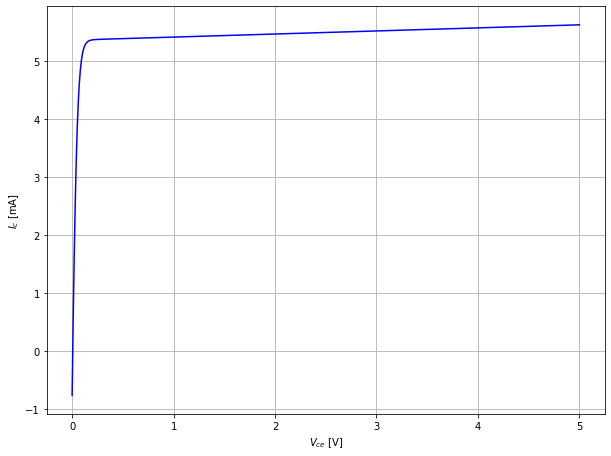

In [12]:
I_c = pd.read_csv('Ic_Vce.csv', sep='\t')
plot_xy(I_c['v3'], 1e3*I_c['Ic(Q2)'], '$V_{ce}$ [V]', '$I_c$ [mA]')

 - For $V_{ce}$ values above a few 10's of mV, collector current varies linearly with $V_{ce}$
 - When the current through a device changes linearly with the voltage across it, this signifies a *resistance*

## DC small-signal model

We need to update our small-signal model to include the effect of finite output resistance

<center><img src="img/BJT_small_signal_model.png" width=600 /></center>

\begin{align}
g_m = \dfrac{I_{C0}}{V_T} \\
\\
r_\pi = \dfrac{\beta}{g_m}\\
\\
r_o = \dfrac{V_A}{I_{C0}}
\end{align}

 - Sometimes called the "hybrid-pi" model, the small-signal model enables us to analyze BJT circuits for analog design
 - Note that by making the "small-signal assumption," we should guarantee that our signal doesn't become so large that our model results in substantial errors
 - A reasonable approach is to run a transient analysis in addition to AC to confirm this

## Common-emitter, revisited

<center><img src="img/CE_small_signal_full.png" width=900 /></center>

 - $r_o$ appears in parallel with $R_C$, resulting in a slightly modified expression for the gain:
 
\begin{align}
v_{out} = -g_mv_{in} \cdot r_o||R_C \rightarrow A_v = \dfrac{v_{out}}{v_{in}} = -g_m \cdot r_o||R_C
\end{align}
 
 - The output impedance now includes both resistances:
 
\begin{align}
r_{out} = r_o||R_C
\end{align}
 
 - Finally, the input impedance is unchanged by the inclusion of $r_o$:
 
\begin{align}
r_{in} = r_\pi = \dfrac{\beta}{g_m}
\end{align}

## Design example

<center><img src="img/CE_small_signal_full.png" width=900 /></center>

 - Let's design a common-emitter amplifier for a DC gain of 100 V/V (40 dB), assuming the following device/system parameters:
 
\begin{align} I_S = 10^{-14} A && T = 300 K \end{align}
\begin{align} V_{CC} = 5 V && V_A = 100 V \end{align}

- We'll use the small-signal model to determine the required bias point (DC base voltage and collector current)  
- Once we establish our design parameters, we need to verify the DC gain, input resistance, and output resistance

## Common-emitter amplifier design

In [13]:
# Design constants
k = 1.38e-23                     # Boltzmann constant
q = 1.6e-19                      # electron charge
T = 300                          # absolute temperature
V_CC = 5                         # supply voltage
V_T = k*T/q                      # thermal voltage

# device parameters
I_S = 1e-14                      # saturation current for 2N3904 npn 
beta = 300                       # 2N3904 beta value
V_A = 100                        # 2N3904 Early voltage

# Design calculations
A_v0 = 100                       # desired gain
R_C = 1e3                        # load resistance
g_m = A_v0/R_C                   # required g_m value
I_C0 = g_m*V_T                   # collector current needed for target g_m
r_o = V_A/I_C0                   # transistor output impedance
R_out = r_o*R_C/(R_C+r_o)        # output resistance
r_in = beta/g_m                  # input resistance
A_v = g_m*R_C*r_o/(R_C + r_o)    # gain with loading ef fect
V_BE0 = V_T*np.log(I_C0/I_S)     # required bias voltage for base
gain_error = (A_v - A_v0)/(A_v0)
print('The required DC base voltage is', f'{V_BE0:0.3}', 'V')
print('The gain value with finite output resistance is', f'{20*np.log10(A_v):0.3}', 'dB')
print('The gain error due to finite output impedance is', f'{gain_error*100:.3}', '%')
print('The output resistance is', f'{R_out:0.3}', 'Ohms')
print('The input resistance is', f'{r_in:0.4}', 'Ohms')

The required DC base voltage is 0.68 V
The gain value with finite output resistance is 39.8 dB
The gain error due to finite output impedance is -2.52 %
The output resistance is 9.75e+02 Ohms
The input resistance is 3e+03 Ohms


## Input bias network

<center><img src="img/common_emitter_bias.png" width=400 /></center>

$$ r_\pi = 3 k\Omega $$

$$ V_{b} = \dfrac{R_{B2}}{R_{B2}+R_{B1}}\cdot 5V = 0.68V $$

$$ R_{bias} = R_{B1}||R_{B2} \leq 300 \Omega $$

$$ f_{3dB,HP} = 10 Hz$$

 - To employ a DC bias for the common-emitter amplifier, we'll use a resistor divider combined with AC coupling for the signal
 - Note that the use of AC coupling prevents the passage of DC signals from input to output
 - We'll use $10Hz$ as the highpass corner (3dB frequency), which assumes the signal of interest is above this frequency

# Bias calculations

In [14]:
# The resistor values must satisfy the loading 
# and bias requirements
K1 = V_BE0/V_CC
K2 = K1/(1-K1)
R1 = (K2+1)*300/K2
R2 = K2*R1

# Calculate a capacitor value that results in
# a 10Hz 3dB frequency
Rbias = R1*R2/(R1+R2)
Rtot = Rbias*r_in/(r_in + Rbias)
f_3dB = 10
w_3dB = 10*np.pi*2
tau = 1/w_3dB
C_AC = tau/Rtot
print('The value of R1 is', f'{1e-3*R1:0.3}', 'kOhms')
print('The value of R2 is', f'{1e-3*R2:0.3}', 'kOhms')
print('The value of C_AC is', f'{1e6*C_AC:0.3}', 'uF')

The value of R1 is 2.21 kOhms
The value of R2 is 0.347 kOhms
The value of C_AC is 58.4 uF


- Let's verify our design in SPICE...